In [25]:
# Data ----> Business Problem ----> EDA -------> Insights/ Trends / Patterns / Observations -------> Business Decisions

# Pre - requisite: Basic Python + pandas + numpy

In [3]:
#Numerical and data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("titanic_dataset.csv")
# https://drive.google.com/file/d/1plN-KWVopblsqOdgTYPn-O-zG5cWrkf7/view?usp=drive_link

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing Value check

In [11]:
#percentage of missing values 
#Identification of missing values
#100*df.isnull().mean()
#100*df.isnull().sum()/df.shape[0]
100*df.isnull().mean()
#Percentage gives 

'''
Identifying missing data as a percentage is more insightful, allowing us to make informed decisions on whether to fix or drop the values.
'''

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
# Missing values colum ---------> age(~20%), Cabin(~77%), Embarked(0.22%)
# Strategy:
#(a) Columns having high Percentage of missing values (>40% or 50 %), directly discard that column from analysis
#(b) Columns having missing values under acceptable range we prefer to ompute then (replace wutg sine values)

In [13]:
#Cabin column has more than 40% of missing values so straight away dropping it
df1=df.drop("Cabin", axis=1)
# axis = 1 as we are dropping the column (axis=0 if you want to drop row)

In [15]:
100*df1.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [17]:
df1.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
med=df1["Age"].median()
df1["Age"]=df1["Age"].fillna(med)

In [20]:
100*df1.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [21]:
arr=np.array([1,2,3,4,5]) 
print("Mean:",np.mean(arr)) 
print("Median:",np.median(arr))


Mean: 3.0
Median: 3.0


In [22]:
arr=np.array([1,2,3,4,100]) 
print("Mean:",np.mean(arr)) 
print("Median:",np.median(arr))

Mean: 22.0
Median: 3.0


In [23]:
mod=df1["Embarked"].mode()[0]
df1["Embarked"]=df1["Embarked"].fillna(mod)

In [24]:
100*df1.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

## Segmentation (Optional)

In [26]:
df1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [27]:
df1.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [28]:
num_cols=["Age","Fare"]
cat_cols=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
extra_cols=["PassengerId","Name","Ticket"]

## Univariant Analysis

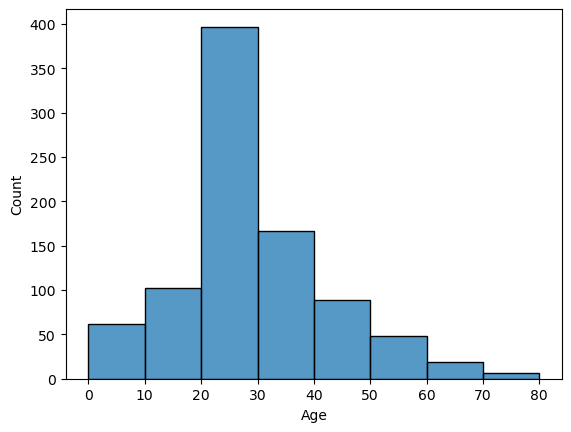

In [34]:
sns.histplot(x=df1["Age"],bins =range(0,90,10))
plt.show()


<Axes: xlabel='Fare', ylabel='Count'>

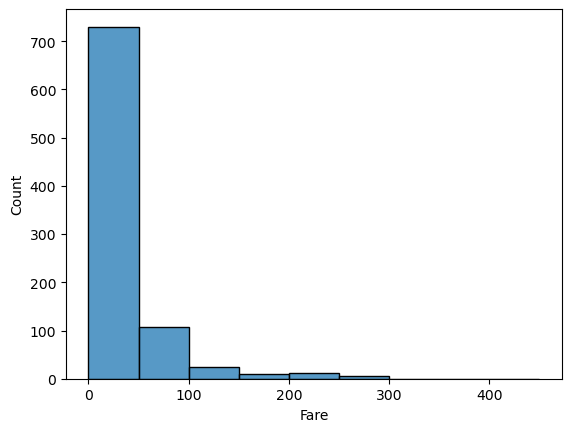

In [31]:
sns.histplot(x=df1["Fare"],bins=range(0,500,50))

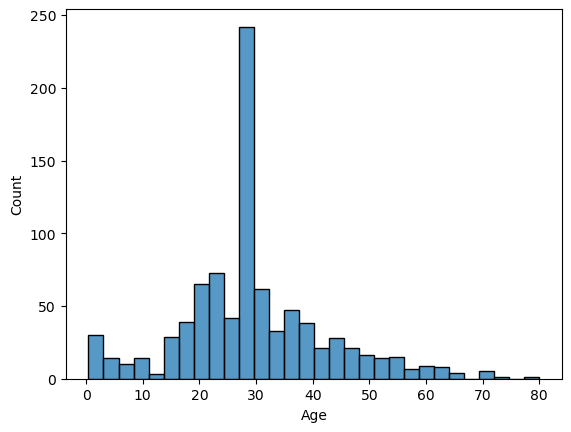

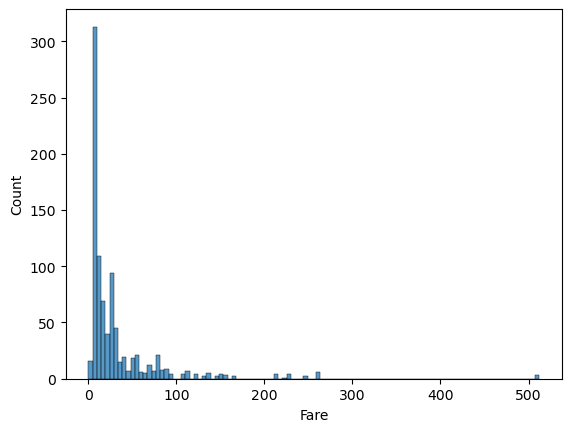

In [35]:
for col in num_cols:
    sns.histplot(x=df1[col])
    plt.show()

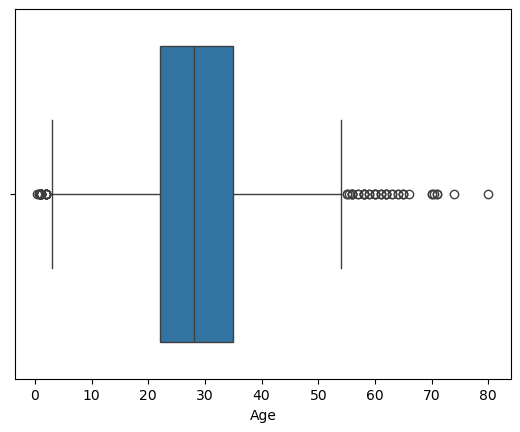

In [37]:
sns.boxplot(x=df1["Age"])
plt.show()

In [40]:
df1["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

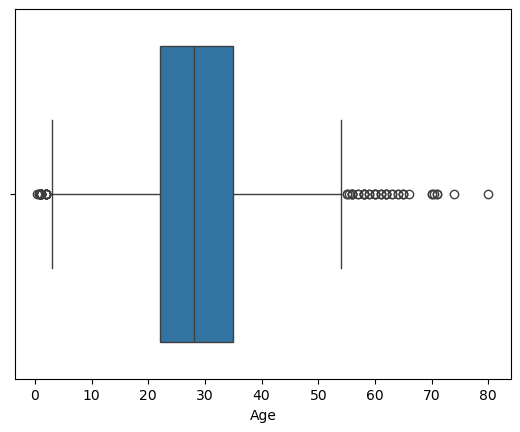

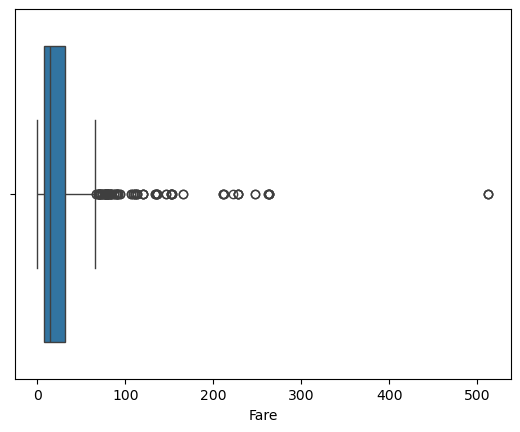

In [41]:
for col in num_cols:
    sns.boxplot(x=df1[col])
    plt.show()

In [43]:
import warnings
warnings.filterwarnings(action="ignore")

In [55]:
df1["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

## Categorical 

<Axes: xlabel='Survived', ylabel='count'>

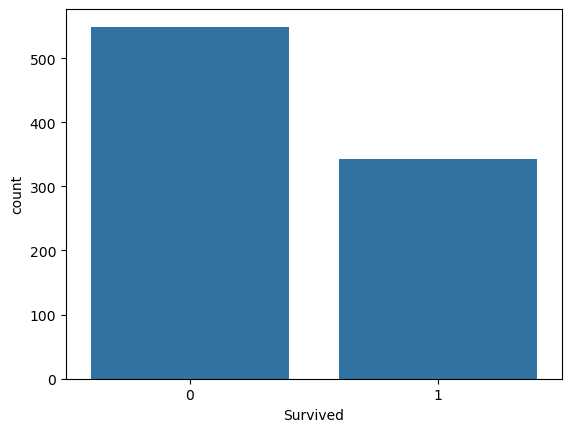

In [44]:
sns.countplot(x=df1["Survived"])

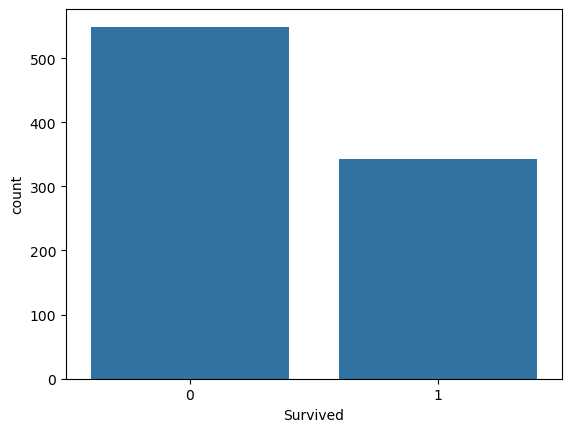

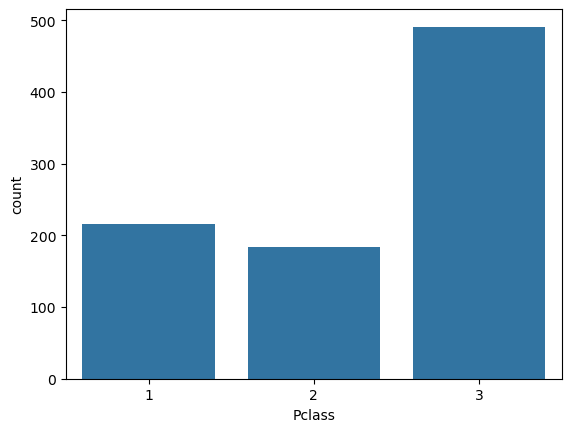

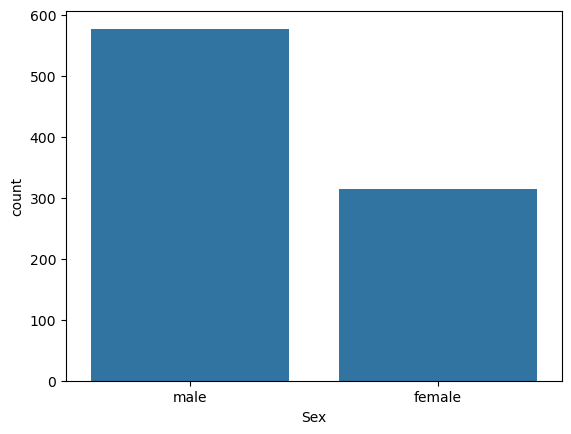

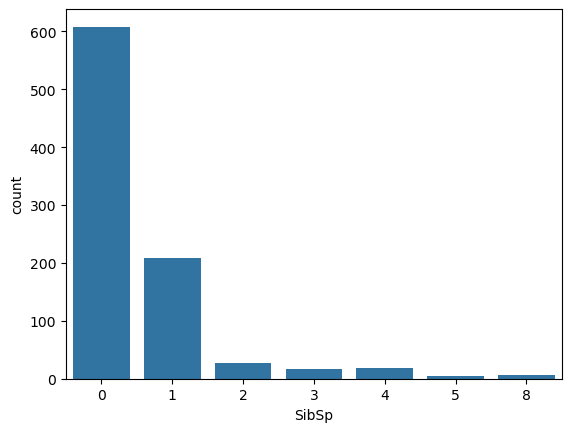

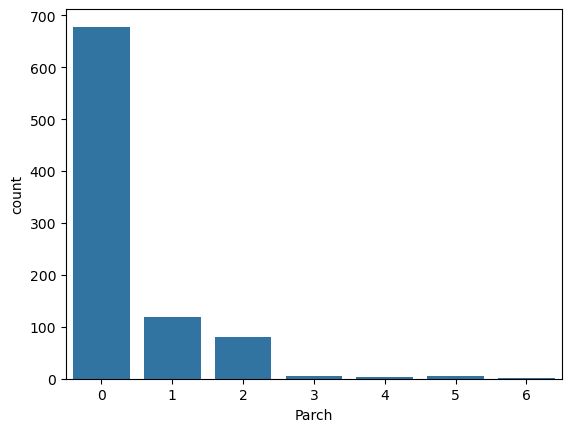

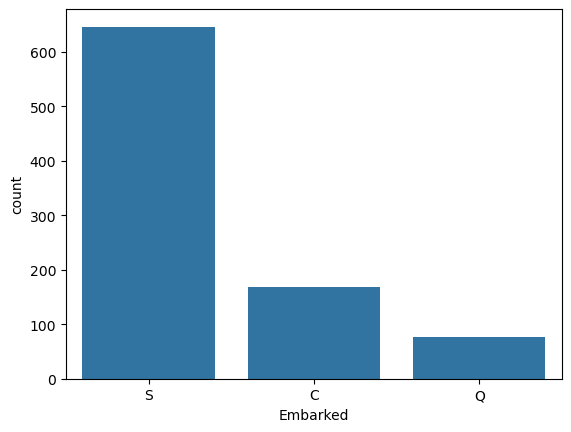

In [47]:
for col in cat_cols:
    sns.countplot(x=df1[col])
    plt.show()

## Bivariate Analysis

### Categorical Vs Numerical

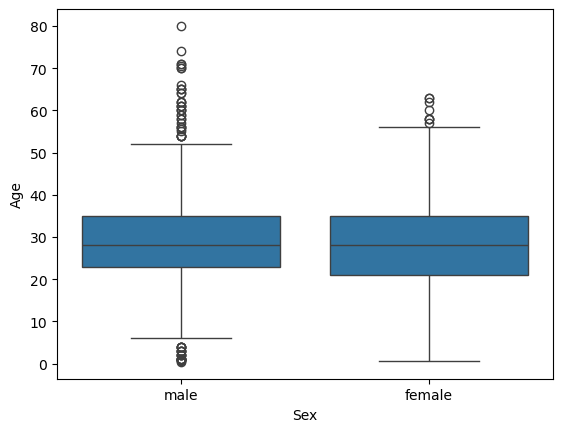

In [52]:
sns.boxplot(x=df1["Sex"], y =df1["Age"])
plt.show()

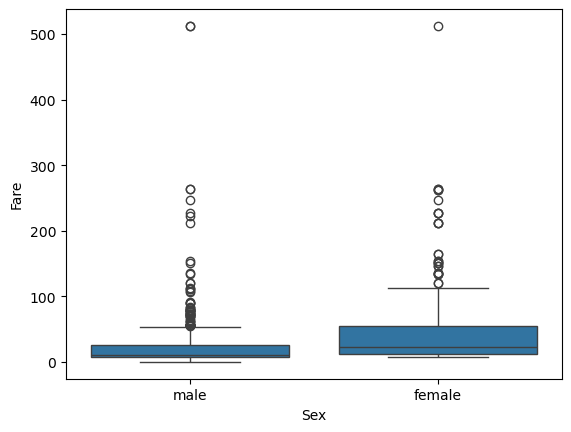

In [53]:
sns.boxplot(x=df1["Sex"], y =df1["Fare"])
plt.show()

### Numerical vs Numerical

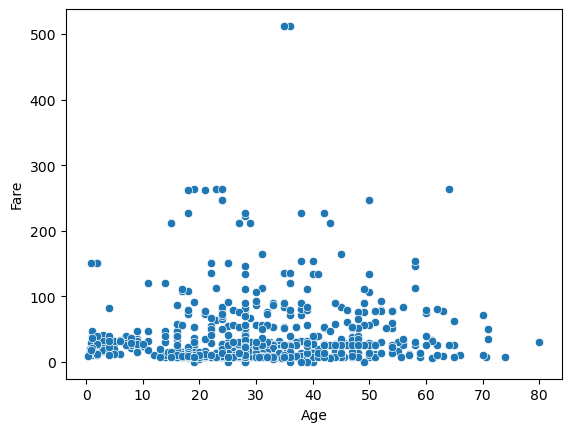

In [56]:
sns.scatterplot(x=df1["Age"], y=df1["Fare"])
plt.show()

In [57]:
# Positive relationship: once variable increase leads to increase to another variable (positive correlation)
#Negative corelationship: one variable increase leads to decrease to another variable (Negative correlation)
#No relationshop: one variable seens unffected from another variable (NO correlation)

In [58]:
### categirucal vs Categorical --- (Homework) ( BarPlot)

## Multivariate Analysis

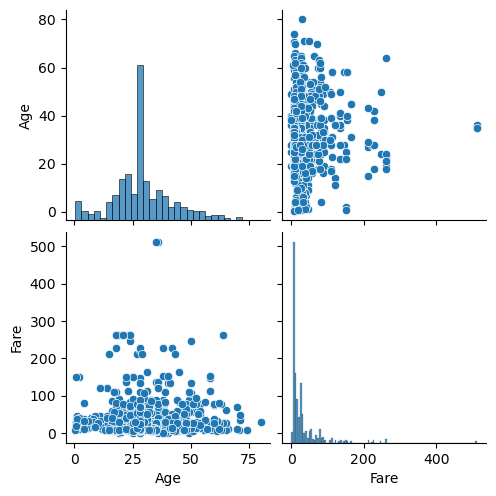

In [62]:
sns.pairplot(df1[num_cols])
plt.show()
#kind{‘scatter’, ‘kde’, ‘hist’, ‘reg’})

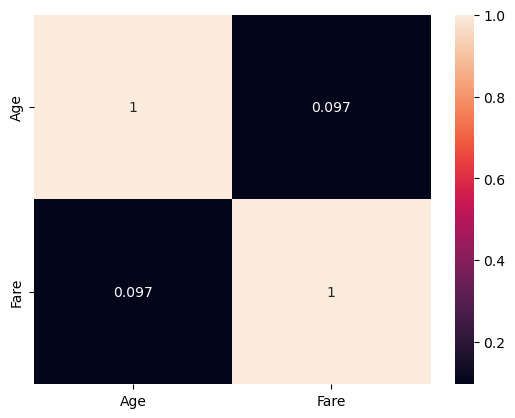

In [64]:
sns.heatmap(df1[num_cols].corr(), annot=True)
plt.show()